# Esercitazione 9
## Il problema del commesso viaggiatore risolto con l'algoritmo genetico
Il programma inizia con la lettura degli input nel file **input.dat**, dove vengono inizializzate le variabili **nstep** (numero di step del GA) e **key**, se uguale a 0 le città sono poste su un cerchio altrimenti su un quadrato.  
Successivamente in **CityPosition** vengono generate le posizioni delle città e conservate nell'array  **c_pos[i][j]**, dove i è l'indice della città e j si riferisce alla coordinata (x se 0 o y se 1).  
Dopo vengono inizializzati i percorsi (funzione **InitPerc**) in una variabile di tipo vector intero a due indici, **v_old[i][j]** si riferisce alla città (non la posizione) visitata al tempo di visita j-esimo nell'i-esimo percorso .  
Ogni volta che vengono modificati i percorsi viene chiamata la funzione **Check**, in modo da verificare che la prima città non venga spostata e che nessuna città sia ripetuta più di una volta. 

Successivamente viene chiamata la funzione **fitness**, che calcola il fitness di ogni percorso ovvero $L^{(1)}$ e $L^{(2)}$, dopo i percorsi vengono ordinati dalla funzione **order**.  
Dopo inizia la parte principale del programma, c'è un ciclo esterno sugli step  del GA e un ciclo interno sui percorsi.  La prima funzione chiamata è **Selection**, in cui vengono scelti due percorsi, che con una certa probabilità (0.70) subiranno il crossover.  
Successivamente, nella function **Mutation** entrambi i percorsi subiranno con una certa probabilità (0.08) le seguenti mutazioni (implementate con l'aiuto della libreria algorithm):
- Permutazione di coppia -->  iter_swap
- Shift  -->  rotate
- Permutazione di un gruppo con un altro gruppo  --> Perm
- Inversione di un gruppo --> reverse

Finito il ciclo più interno, è stato ottenuto un nuovo set di percorsi a cui verrà calcolato il fitness e ordinati, dopo vengono scritti su file i risultati in Averages.  
Gli output sono 4:  
- AvL1.out media di $L^{(1)}$ sui migliori cinquanta percorsi
- AvL2.out media di $L^{(2)}$ sui migliori cinquanta percorsi
- BsL1.out valore di $L^{(1)}$ sul miglior percorso
- bsL2.out valore di $L^{(2)}$ sul miglior percorso
 
 Alla fine degli step del GA, viene scritto su **"BsPath.out"** il miglior percorso.

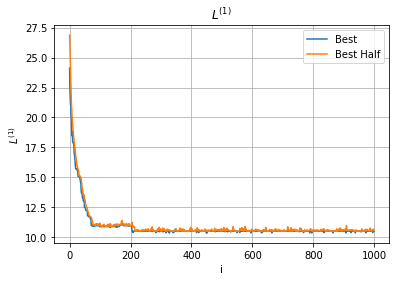

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

#input file
N=1000
l1_b = np.zeros(N)
file_data = np.loadtxt('BsL1.out', usecols=(1))
l1_b = file_data[:]

l1_bh = np.zeros(N)
file_data2 = np.loadtxt('AvL1.out', usecols=(1))
l1_bh = file_data2[:]
i = np.arange(N)      # [0,1,2,...,N-1]

plt.plot(i,l1_b)
plt.plot(i,l1_bh)
plt.title('$L^{(1)}$')
plt.legend(['Best','Best Half'], loc='best')
plt.xlabel('i')
plt.ylabel('$L^{(1)}$')
#plt.ylim([2,3])
#plt.savefig('Pictures/square_l1', dpi=300)
plt.grid(True)
plt.show()


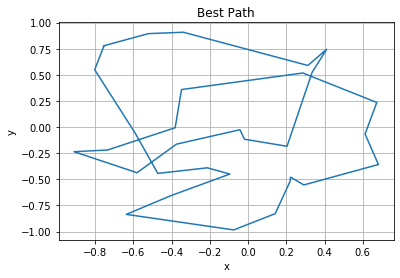

In [9]:
Nct=32
x = np.zeros(Nct)
y = np.zeros(Nct) 
file_data = np.loadtxt('BsPath.out', usecols=(0,1))
x = file_data[:,0]
y = file_data[:,1]

plt.plot(x,y)
plt.title('Best Path')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('Pictures/square_bspath', dpi=300)
plt.grid(True)
plt.show()

# 32 città su una circonferenza
<img src="./Pictures/circ_l1.png" alt="Drawing" style="width: 500px;"/>
Valore finale di $L^{(1)}$ del miglior percorso: 6.33284  

Quando viene raggiunto un minimo, sia locale che globale, $L^{(1)}$ diventa costante.  
<img src="./Pictures/circ_bspath.png" alt="Drawing" style="width: 500px;"/>
E' stato raggiunto il minimo, dato che nel caso della circonferenza il percorso che minimizza la distanza è quello in cui la circonferenza viene percorsa in senso orario (o antiorario). 

# 32 città su un quadrato
Per ottenere i seguenti risultati sono stati usati gli stessi parametri che hanno minimizzato la circonferenza:
<img src="./Pictures/square_l1.png" alt="Drawing" style="width: 500px;"/>
Valore finale di $L^{(1)}$ del miglior percorso: 10.5078 

Quando viene raggiunto un minimo locale $L^{(1)}$ diventa costante.
<img src="./Pictures/square_bspath.png" alt="Drawing" style="width: 500px;"/>